In [2]:
import alphalens as al

/Users/kingf.wong/.conda/envs/FinanceML/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
import pandas as pd
import yaml
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import describe


In [143]:
sentiment_df = pd.read_csv("../sp500project/data/output/sentiment_10k_final.csv", index_col=0)


str_replace_dd =["join return empty except title row",
                 "summa won't rank",
                 "full_text is empty",
                 "missing items",
                "missing end item"]

sentiment_df[['item1a','item7','item7a']] = sentiment_df[['item1a','item7','item7a']].replace(str_replace_dd, np.nan)
sentiment_df.filing_date = pd.to_datetime(sentiment_df.filing_date)

# print(sentiment_df.head(10))

sp500_price = pd.read_pickle("../sp500project/data/price/sp500_price_20200702.pkl")

## 
sp500_price = sp500_price.drop_duplicates(['Date','ticker'], keep='first')

sp500_price = sp500_price.merge(sentiment_df, how='left',
                                left_on=['Date', 'ticker'],
                                right_on=['filing_date','ticker'])

# print(sp500_price.head(10))


## Front fill sentiment score
sp500_price = sp500_price.sort_values(["ticker","Date"])

sp500_price.Date = pd.to_datetime(sp500_price.Date)
sp500_price.set_index(['Date'], inplace=True)

sp500_price = sp500_price.sort_index()



sp500_price['item1a'] = sp500_price.groupby(['ticker'])['item1a'].ffill().fillna(0).astype(np.float64)
sp500_price['item7'] = sp500_price.groupby(['ticker'])['item7'].ffill().fillna(0).astype(np.float64)
sp500_price['item7a'] = sp500_price.groupby(['ticker'])['item7a'].ffill().fillna(0).astype(np.float64)

sp500_price['Close'] = sp500_price.groupby(['ticker'])['Close'].ffill().astype(np.float64)

sp500_price = sp500_price[sp500_price.index >= pd.to_datetime("2000-01-10")]

In [144]:
sp500_price.index = sp500_price.index.to_pydatetime()

In [145]:
factors = sp500_price[['ticker','item7']].set_index([sp500_price.index, 'ticker']).fillna(0)
factors.index.name

In [146]:
factors.index.names = 2*[None]

In [147]:
factors

item7
2000-01-10 TAP   0.000000
           BMY   0.000000
           AEP   0.007614
           CCL   0.000000
           HRL   0.000000
...                   ...
2020-07-01 ETR   0.000000
           EVRG  0.000000
           EW    0.000000
           ES    0.000000
           ZTS   0.000000

[2297947 rows x 1 columns]

In [148]:
prices = sp500_price[['ticker','Close']].pivot_table(index=sp500_price.index, columns=['ticker'], values=['Close']).rename_axis(None)


In [149]:
prices.columns.names = [None, None]

In [150]:
prices.columns = prices.columns.droplevel()

In [151]:
prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2000-01-10,68.94,NaN,NaN,97.75,NaN,19.50,41.00,35.25,NaN,67.25,...,47.75,83.75,24.44,23.75,NaN,37.06,NaN,54.69,52.66,NaN
2000-01-11,68.00,NaN,NaN,92.75,NaN,20.12,39.63,34.75,NaN,62.63,...,43.94,84.75,24.44,23.50,NaN,36.81,NaN,55.06,49.88,NaN
2000-01-12,66.63,NaN,NaN,87.19,NaN,20.12,39.19,34.06,NaN,62.31,...,43.94,83.50,23.91,23.44,NaN,36.44,NaN,53.69,50.31,NaN
2000-01-13,67.63,NaN,NaN,96.75,NaN,23.69,42.00,33.75,NaN,65.63,...,45.25,85.44,24.94,24.06,NaN,37.00,NaN,53.88,54.69,NaN
2000-01-14,68.38,NaN,NaN,100.44,NaN,22.19,42.75,34.50,NaN,66.31,...,48.19,83.75,24.63,23.56,NaN,36.00,NaN,59.94,55.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25,87.26,13.17,142.91,364.84,96.99,100.67,241.75,89.62,217.32,436.95,...,93.29,45.17,42.82,15.65,62.16,86.00,115.30,253.64,34.25,135.31
2020-06-26,85.90,12.38,139.99,353.63,96.13,99.18,239.27,88.71,212.47,426.92,...,91.02,43.62,43.12,15.06,63.16,84.79,115.43,246.42,32.29,132.66
2020-06-29,87.29,13.32,142.75,361.78,96.44,98.99,240.22,89.01,212.72,424.20,...,91.96,44.32,43.91,15.30,64.26,86.98,116.90,252.05,33.05,131.98
2020-06-30,88.37,13.07,142.45,364.80,98.18,100.77,241.56,91.43,214.72,435.31,...,98.39,44.72,44.06,15.29,64.96,86.91,119.36,255.95,34.00,137.04


In [153]:
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=factors["item7"],
    prices=prices,
    quantiles=2,
    periods=(1, 5, 10))

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.562368,0.000000,-0.004341,0.026610,1884752,82.209919
2,0.000259,0.702626,0.077753,0.080532,407857,17.790081


Returns Analysis


,1D,5D,10D
Ann. alpha,-0.012,-0.013,-0.014
beta,-0.026,-0.032,-0.034
Mean Period Wise Return Top Quantile (bps),-0.404,-0.341,-0.391
Mean Period Wise Return Bottom Quantile (bps),0.052,0.042,0.051
Mean Period Wise Spread (bps),-0.456,-0.411,-0.471


/Users/kingf.wong/.conda/envs/FinanceML/lib/python3.7/site-packages/alphalens/tears.py:275: UserWarning: 'freq' not set in factor_data index: assuming business day
  UserWarning,


<Figure size 432x288 with 0 Axes>

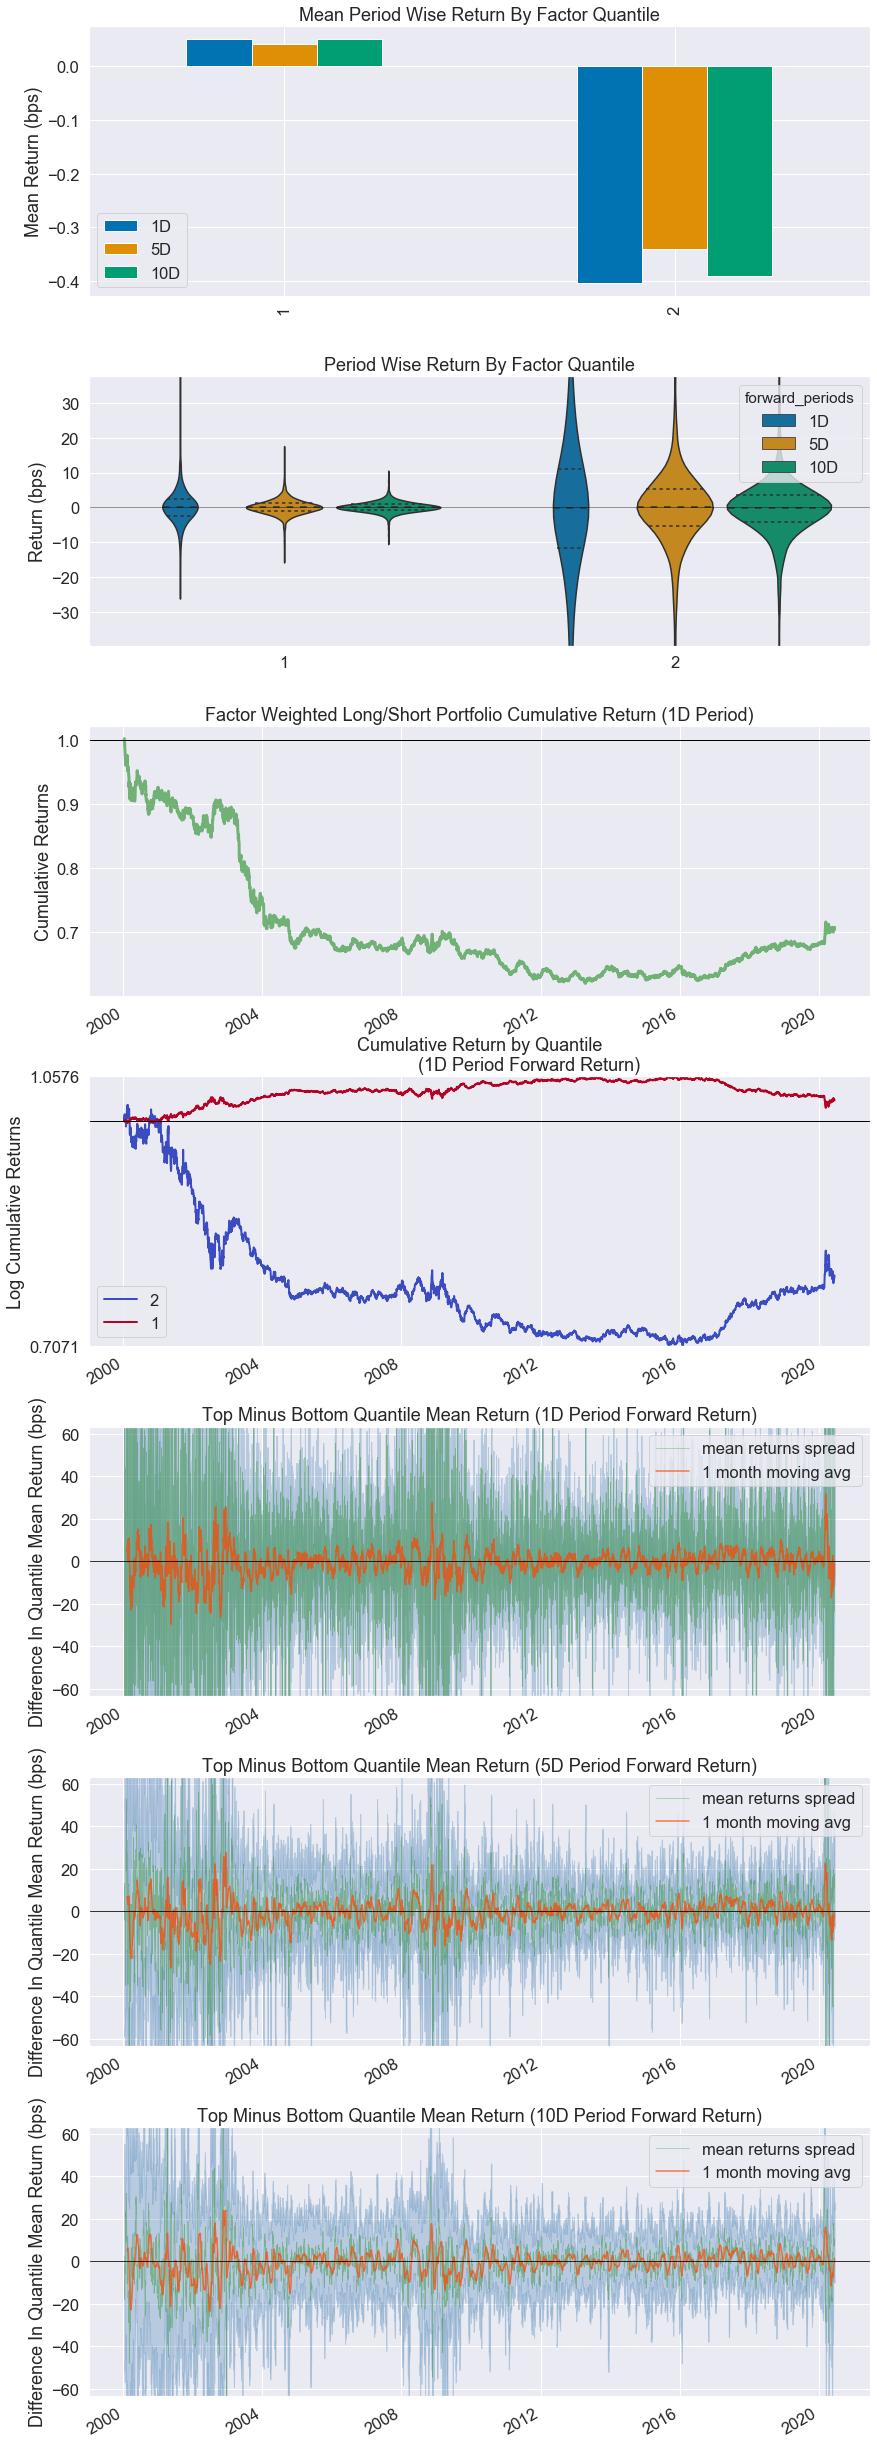

Information Analysis


,1D,5D,10D
IC Mean,0.000,-0.001,-0.003
IC Std.,0.053,0.053,0.052
Risk-Adjusted IC,0.007,-0.022,-0.049
t-stat(IC),0.530,-1.553,-3.508
p-value(IC),0.596,0.121,0.000
IC Skew,0.011,-0.002,0.067
IC Kurtosis,-0.018,0.069,0.016


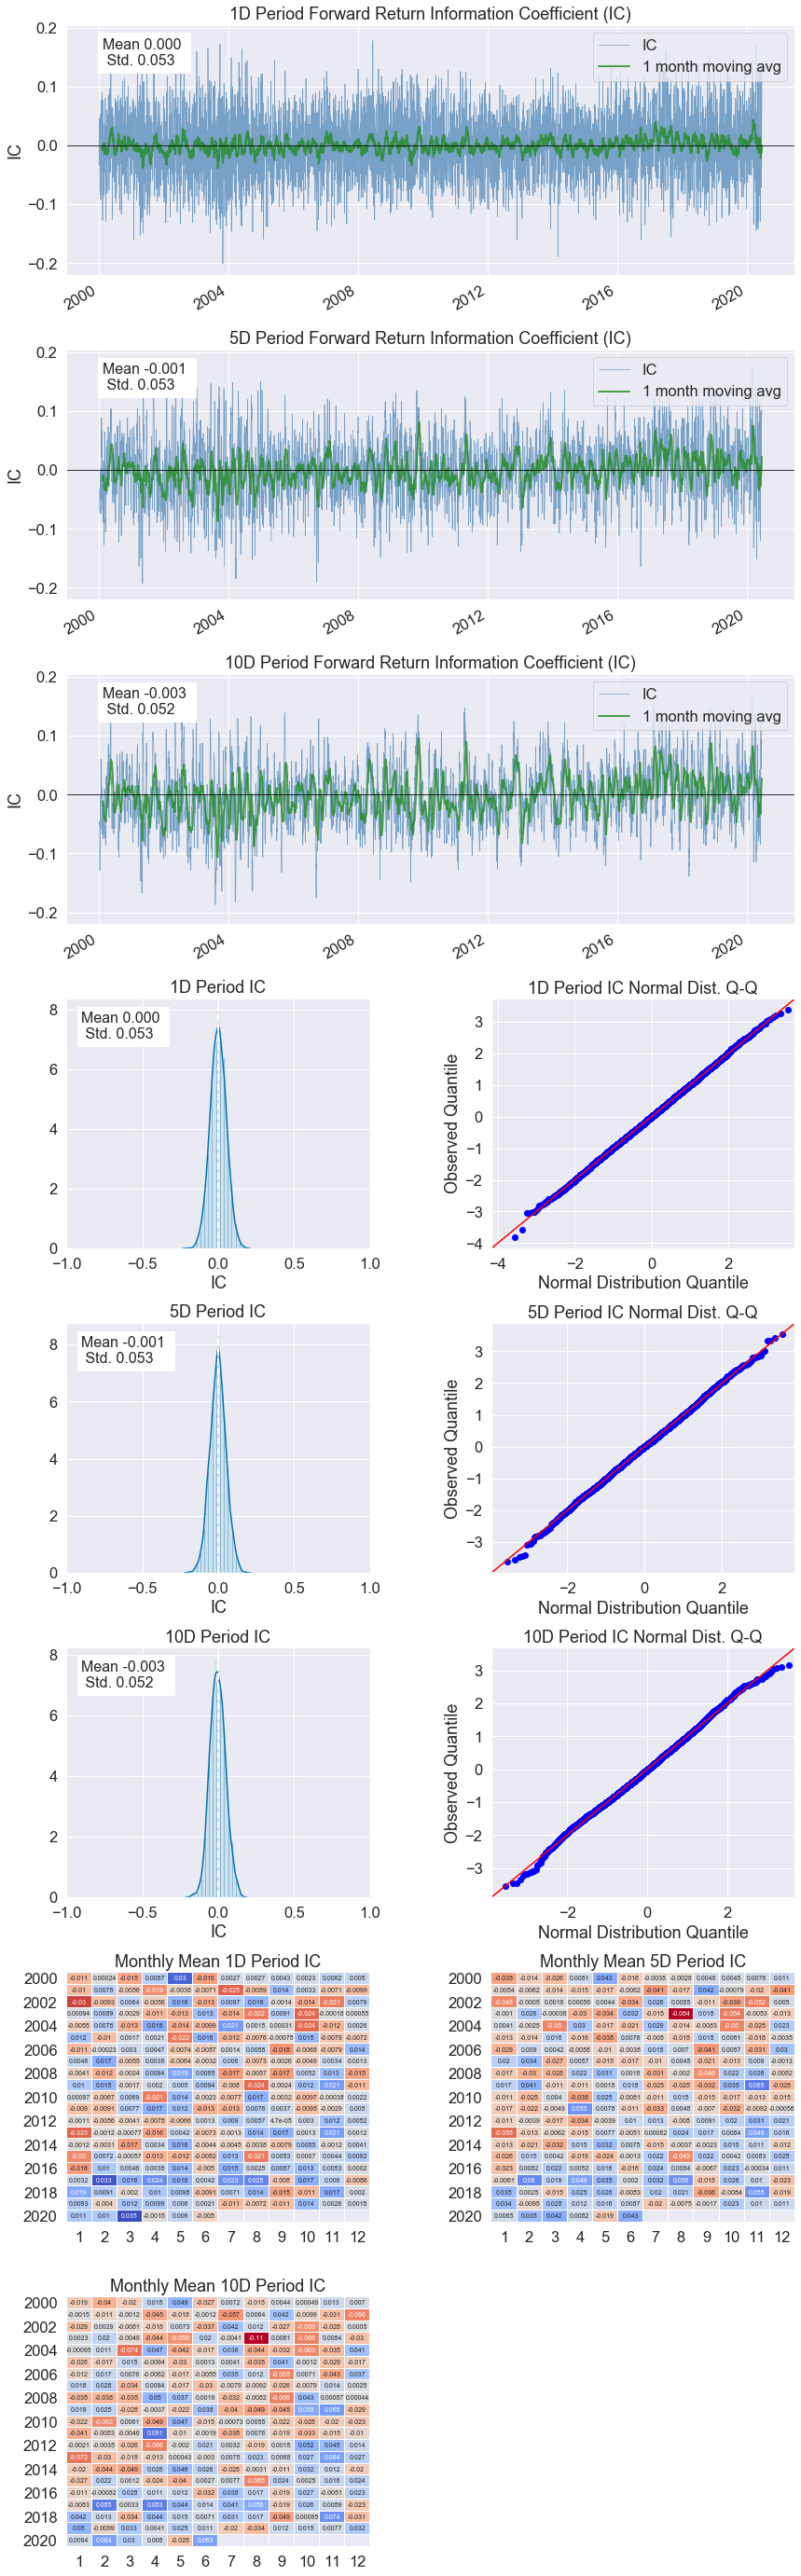

/Users/kingf.wong/.conda/envs/FinanceML/lib/python3.7/site-packages/alphalens/utils.py:911: UserWarning: Skipping return periods that aren't exact multiples of days.
  "Skipping return periods that aren't exact multiples"


AttributeError: 'Index' object has no attribute 'get_values'

In [155]:
al.tears.create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=False)

In [139]:
pf_returns, pf_positions, pf_benchmark = \
    al.performance.create_pyfolio_input(factor_data,
                                        period='5D',
                                        capital=1000000,
                                        long_short=False,
                                        group_neutral=False,
                                        equal_weight=True,
                                        quantiles=[1,2],
                                        groups=None,
                                        benchmark_period='1D')

TypeError: cumulative_returns() takes 1 positional argument but 2 were given

In [ ]:
import pyfolio as pf